In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\satheesh\Downloads\synthetic_customer_data.csv")
df

,age,income,experience,spend_score,purchased
0,27,43867,7,33.867,0
1,40,76237,17,72.237,1
2,49,104165,28,95.000,1
3,35,66145,16,78.145,1
4,31,58015,12,63.015,1
...,...,...,...,...,...
195,49,125046,29,95.000,1
196,24,25705,1,20.000,0
197,33,63662,13,50.662,0
198,27,35841,7,46.841,0


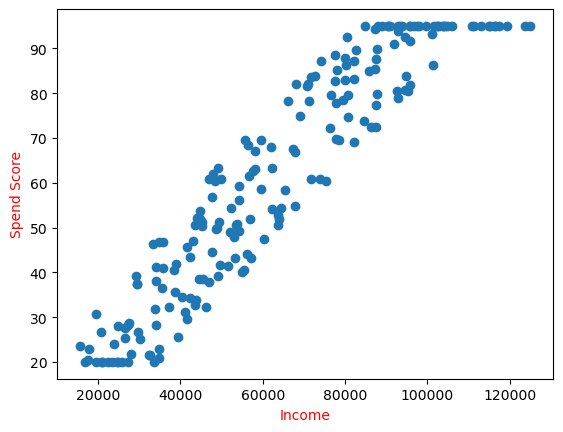

In [11]:
plt.scatter(df['income'], df['spend_score'])
plt.xlabel("Income", color="Red")
plt.ylabel("Spend Score", color="Red")
plt.show()

Converged at iteration 15
Final Inertia (Custom K-Means): 11137751639.519419


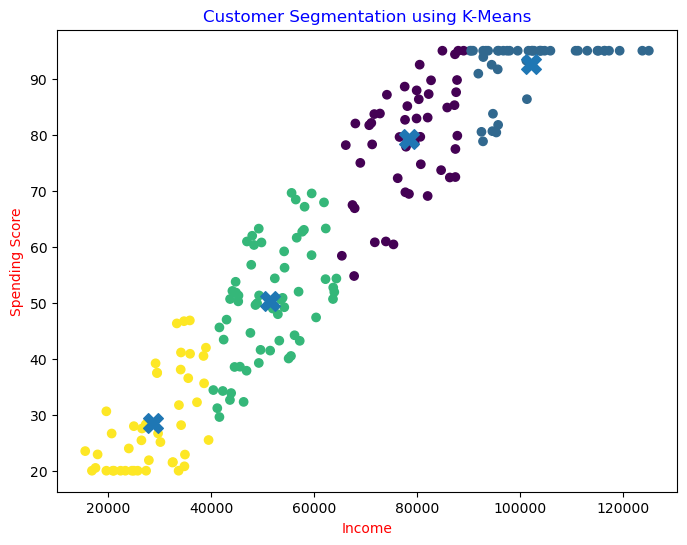

C:\Users\satheesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\satheesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Final Inertia (Scikit-Learn KMeans): 11119014323.31233


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# STEP 1: Load the dataset
# -----------------------------
data = pd.read_csv(r"C:\Users\satheesh\Downloads\synthetic_customer_data.csv")

# -----------------------------
# STEP 2: Select features
# -----------------------------
features = data[['age', 'income', 'experience', 'spend_score']].values

# -----------------------------
# STEP 3: Set number of clusters
# -----------------------------
K = 4

# -----------------------------
# STEP 4: Initialize centroids randomly
# -----------------------------
np.random.seed(42)

random_indices = np.random.choice(len(features), K, replace=False)
centroids = []

for idx in random_indices:
    centroids.append(features[idx])

centroids = np.array(centroids)

# -----------------------------
# STEP 5–7: K-Means Algorithm
# -----------------------------
for iteration in range(100):

    # ---------- STEP 5: Assign clusters ----------
    labels = []

    for i in range(len(features)):

        distances = []

        for k in range(K):
            distance = np.linalg.norm(features[i] - centroids[k])
            distances.append(distance)

        cluster_label = np.argmin(distances)
        labels.append(cluster_label)

    labels = np.array(labels)

    # ---------- STEP 6: Update centroids ----------
    new_centroids = []

    for k in range(K):

        cluster_points = []

        for i in range(len(features)):
            if labels[i] == k:
                cluster_points.append(features[i])

        cluster_points = np.array(cluster_points)

        centroid = cluster_points.mean(axis=0)
        new_centroids.append(centroid)

    new_centroids = np.array(new_centroids)

    # ---------- STEP 7: Check convergence ----------
    if np.allclose(centroids, new_centroids):
        print(f"Converged at iteration {iteration}")
        break

    centroids = new_centroids

# -----------------------------
# STEP 8: Calculate Inertia (Custom K-Means)
# -----------------------------
custom_inertia = 0

for i in range(len(features)):
    centroid = centroids[labels[i]]
    distance = np.linalg.norm(features[i] - centroid)
    custom_inertia += distance ** 2

print("Final Inertia (Custom K-Means):", custom_inertia)


# -----------------------------
# STEP 9: Visualization
# -----------------------------
plt.figure(figsize=(8, 6))

plt.scatter(
    data['income'],
    data['spend_score'],
    c=labels
)

plt.scatter(
    centroids[:, 1],
    centroids[:, 3],
    marker='X',
    s=200
)

plt.xlabel("Income", color="Red")
plt.ylabel("Spending Score", color="Red")
plt.title("Customer Segmentation using K-Means", color="blue")
plt.show()

# -----------------------------




# -----------------------------
# Scikit-Learn Inertia Code
# -----------------------------
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(features)

sklearn_inertia = kmeans.inertia_

print("Final Inertia (Scikit-Learn KMeans):", sklearn_inertia)

